***Inlämningsuppgift i kursen Grundläggande programmering i Python sommaren 2020***

__Deluppgift 1:__ Skapa egendefinerade funktioner som beräknar medelvärde, minsta värde och största värde ur en numerisk lista. Använd skelettet i nedanstående cell. 

In [17]:
# Deluppgift1:
# ------------
# Egendefinierade funktioner för medelvärde, största- och minsta värde i en numerisk lista (num_lista)

# Medelvärde:
def mean_value(num_lista):
    if num_lista:
        return sum(num_lista) / len(num_lista)
    raise ValueError('Kan ej beräkna medeltal för en tom lista')

# Största värde:
def max_value(num_lista):
    # Återimplementerar Pythons inbyggda funktion max()
    if num_lista:
        max_varde = num_lista[0]
        for v in num_lista:
            if v > max_varde:
                max_varde = v
        return max_varde
    raise ValueError('Kan ej hitta största värde för en tom lista')

# Minsta värde:
def min_value(num_lista):
    # Återimplementerar Pythons inbyggda funktion min()
    if num_lista:
        min_varde = num_lista[0]
        for v in num_lista:
            if v < min_varde:
                min_varde = v
        return min_varde
    raise ValueError('Kan ej hitta minsta värde för en tom lista')


In [18]:
# Deluppgift 1:
# -------------
# Testa dina egendefinierade funktioner på nedanstående lista och skriv ut svaren på skärmen
# (Observera att du måste köra ovanstående cell (Run) innan du kan använda funktionerna)

num_lista = [10, 15, -3.25, 73.8, -99.8]

# Skriv koden här:
print(mean_value(num_lista))
print(max_value(num_lista))
print(min_value(num_lista))

-0.85
73.8
-99.8


__Deluppgift 2:__ Läs innehållet i CSV-filen __trafikdata.csv__ och spara dess innehåll i listan __trafik_data__. Använd nedanstående cell.

In [19]:
# Deluppgift 2:
# -------------
# Läs innehållet i CSV-filen trafikdata.csv och spara dess innehåll i listan trafik_data. 

import csv

with open('trafikdata.csv') as file:
    csv_reader = csv.reader(file, delimiter=';')
    # Kastar bort header-raden här. Bättre felhantering i uppgift 6.
    next(csv_reader)
    trafik_data = [r for r in csv_reader]

In [4]:
# Deluppgift 2:
# -------------
# Uppgift: Verifiera ovanstående kod genom att skriva ut innehållet i 3:e raden i listan trafik_data
# (Observera att du måste köra ovanstående cell (Run) innan du får tillgång till listan trafik_data)

# Skriv koden här:
# Tredje _dataraden_, exklusive header
print(trafik_data[2])

['2013', 'kvartal 3', '8736', '2', '7', '21']


__Deluppgift 3:__ Utför dataanalys på innehållet i listan __trafik_data__ och skapa en ny lista med namnet __analyserad_data__ som innehåller en rad för varje år och där kolumnernas innehåll ska vara enligt följande:<br>


Kolumn 0: År <br>
Kolumn 1: Total försening [h]  <br>
Kolumn 2: Genomsnittlig försening för samtliga tåg (medelvärde baserat på kvartalsvärden) <br>
Kolumn 3: Genomsnittlig försening för samtliga tåg (minsta förseningen baserad på kvartalsvärden) <br>
Kolumn 4: Genomsnittlig försening för samtliga tåg (längsta förseningen baserat på kvartalsvärden) <br>
Kolumn 5: Genomsnittlig försening för försenade tåg (medelvärde baserat på kvartalsvärden) <br>
Kolumn 6: Genomsnittlig försening för försenade tåg (minsta förseningen baserat på kvartalsvärden) <br>
Kolumn 7: Genomsnittlig försening för försenade tåg (längsta förseningen baserat på kvartalsvärden) <br>
Kolumn 8: Genomsnittlig försening av försenade tåg som är mer än 5 minuter försenade (medelvärde baserat på kvartalsvärden)<br>
Kolumn 9: Genomsnittlig försening av försenade tåg som är mer än 5 minuter försenade (minsta förseningen baserat på kvartalsvärden) <br>
Kolumn 10: Genomsnittlig försening av försenade tåg som är mer än 5 minuter försenade (längsta förseningen baserat på kvartalsvärden) <br> <br>
För att beräkna medelvärde-, minsta och längsta försening ska funktionerna i deluppgift 1 användas.


   


In [20]:
# Deluppgift 3:
# -------------

# Utför dataanlys på listan trafik_data enligt beskrivning ovan.

# Skriv koden här:
import re

KVARTAL_PER_ÅR = 4

# Kolumner i filen
OFFSET_ÅR = 0
OFFSET_KVARTAL = 1
OFFSET_TOTAL = 2
OFFSET_GENOMSNITTLIG_FÖRSENING = 3
OFFSET_FÖRSENADE = 4
OFFSET_FÖRSENADE_MINST_5 = 5

ANTAL_DATAKOLUMNER = 6


class Årsgruppering:
    """
    Håller ihop data för ett år och möjliggör aggregering.
    """

    def __init__(self, år):
        # Enkel sanity check för årtal som placerar oss kring relevant tidsperiod
        if not re.match(r"^(19\d{2}|2\d{3})$", år):
            raise ValueError(f"Ogiltigt år: {år}")
        self.år = år
        self.total_försening = 0
        self.förseningar_samtliga = []
        self.förseningar_försenade = []
        self.förseningar_minst_fem_plus = []

    def lägg_till_kvartalsrad(self, rad):
        """Lägger till en rad innehållande data för ett kvartal. Gör grundläggande, men ej uttömmande,
        sanity checks på raden, eftersom den inte är typad på något sätt. Emedan kursen inte ställer krav på
        avancerad felhantering, så görs här simplistisk felhantering.
        """

        if len(rad) != ANTAL_DATAKOLUMNER:
            raise ValueError(f"En kvartalsrad förväntas ha {ANTAL_DATAKOLUMNER} kolumner; hade {len(rad)}")
        if rad[OFFSET_ÅR] != self.år:
            raise ValueError(f"Försök att lägga till data för år {rad[OFFSET_ÅR]} i årsgruppering för år {self.år}")
        if not re.match(r"^kvartal [1-4]$", rad[OFFSET_KVARTAL]):
            raise ValueError(f"Andra kolumnen förväntas inneålla ett kvartal; innehöll {rad[OFFSET_KVARTAL]}")
        for kolumn in range(2, ANTAL_DATAKOLUMNER):
            if not rad[kolumn].isnumeric():
                raise ValueError(f"Värdet i kolumn {kolumn} förväntas vara numeriskt; var {rad[kolumn]}")

        # Här vet man de facto inte om minuterna alltid är heltal, men de är det i den fil vi använder.
        self.total_försening += int(rad[OFFSET_TOTAL])
        self.förseningar_samtliga.append(int(rad[OFFSET_GENOMSNITTLIG_FÖRSENING]))
        self.förseningar_försenade.append(int(rad[OFFSET_FÖRSENADE]))
        self.förseningar_minst_fem_plus.append(int(rad[OFFSET_FÖRSENADE_MINST_5]))

    def aggregera(self):
        """ Aggregerar årsdatat till en lista innehållande medel, min och max för de olika förseningstyperna. """

        # Ja, den här kollen är lite trivial, men enkel fehnatering var det...
        if len(self.förseningar_samtliga) != KVARTAL_PER_ÅR:
            raise RuntimeError("Kan inte aggregera, eftersom grupperingen inte innehåller fyra kvartal")

        # Gör allt till floats redan här för att passa det angivna utskriftsformatet
        return [
            self.år,
            float(self.total_försening),
            float(mean_value(self.förseningar_samtliga)),
            float(min_value(self.förseningar_samtliga)),
            float(max_value(self.förseningar_samtliga)),
            float(mean_value(self.förseningar_försenade)),
            float(min_value(self.förseningar_försenade)),
            float(max_value(self.förseningar_försenade)),
            float(mean_value(self.förseningar_minst_fem_plus)),
            float(min_value(self.förseningar_minst_fem_plus)),
            float(max_value(self.förseningar_minst_fem_plus))
        ]

analyserad_data = []
if trafik_data:
    nuvarande_år = trafik_data[0][0]
    årsgruppering = Årsgruppering(nuvarande_år)
    for rad in trafik_data:
        if rad[0] != nuvarande_år:
            analyserad_data.append(årsgruppering.aggregera())
            nuvarande_år = rad[0]
            årsgruppering = Årsgruppering(nuvarande_år)
        årsgruppering.lägg_till_kvartalsrad(rad)
    analyserad_data.append(årsgruppering.aggregera())        

In [21]:
# Deluppgift 3:
# -------------

# Skriv ut innehållet i listan analyserad_data för att verifiera att är innehållet är korrekt
# Skriv koden här:
for årsrad in analyserad_data:
    print(årsrad)

['2013', 40432.0, 2.75, 2.0, 3.0, 7.75, 7.0, 8.0, 22.5, 21.0, 24.0]
['2014', 43677.0, 2.5, 2.0, 3.0, 8.5, 7.0, 10.0, 22.75, 19.0, 25.0]
['2015', 43310.0, 3.0, 3.0, 3.0, 8.0, 8.0, 8.0, 22.25, 22.0, 23.0]
['2016', 44788.0, 2.5, 2.0, 3.0, 7.75, 7.0, 8.0, 22.75, 21.0, 24.0]
['2017', 46665.0, 2.75, 2.0, 3.0, 8.25, 8.0, 9.0, 24.0, 23.0, 25.0]
['2018', 62539.0, 3.75, 3.0, 4.0, 10.0, 8.0, 12.0, 25.5, 22.0, 29.0]
['2019', 44676.0, 2.5, 2.0, 3.0, 8.25, 7.0, 9.0, 24.5, 23.0, 26.0]


__Deluppgift 4:__ Skapa en egendefinierad funktion med namnet __resultat_tabell__ som har listan __analyserad_data__ som argument och som genererar den resultattabell (ifylld) som finns visad under fliken _Inlämningsuppgift_ i PingPong.

In [22]:
# Deluppgift 4:
# -------------

# Skapa resultattabellen.
def formatera_förseningssektion(rubrik, data, startkolumn):
    sektionsrubrik = f"Genomsnittlig försening {rubrik} [min] (baserat på kvartalsvärden)"
    sektion = f"""\n\n{sektionsrubrik}
{'=' * len(sektionsrubrik)}

År      Försening medel         Försening min           Försening max
---------------------------------------------------------------------
"""
    for årsdata in data:
        sektion += f"{årsdata[0]:8}{årsdata[startkolumn]:<24}{årsdata[startkolumn + 1]:<24}{årsdata[startkolumn + 2]:<24}\n"
    return sektion


def resultat_tabell(analyserad_data):
    tabell = """
************************************** R E S U L T A T **************************************
    
Total försening alla tåg [h]
============================
    
År      Försening [h]
----------------------------------\n"""
    for årsdata in analyserad_data:
        tabell += f"{årsdata[0]}\t{årsdata[1]}\n"

    tabell += formatera_förseningssektion("för samtliga tåg", analyserad_data, startkolumn=2)
    tabell += formatera_förseningssektion("av försenade tåg", analyserad_data, startkolumn=5)
    tabell += formatera_förseningssektion("av tåg försenade mer än 5 minuter", analyserad_data, startkolumn=8)
    tabell += "\n" + ("*" * 92)
    return tabell

In [23]:
# Deluppgift 4:
# -------------

# Verifiera att resultattabellen (innehåll och utseende) ser korrekt ut genom att skriva ut innehållet i listan
# analyserad data. Glöm inte att listan måste vara genererad sedan tidigare. 

# Skriv koden här:
print(resultat_tabell(analyserad_data))


************************************** R E S U L T A T **************************************
    
Total försening alla tåg [h]
    
År      Försening [h]
----------------------------------
2013	40432.0
2014	43677.0
2015	43310.0
2016	44788.0
2017	46665.0
2018	62539.0
2019	44676.0


Genomsnittlig försening för samtliga tåg [min] (baserat på kvartalsvärden)

År      Försening medel         Försening min           Försening max
---------------------------------------------------------------------
2013    2.75                    2.0                     3.0                     
2014    2.5                     2.0                     3.0                     
2015    3.0                     3.0                     3.0                     
2016    2.5                     2.0                     3.0                     
2017    2.75                    2.0                     3.0                     
2018    3.75                    3.0                     4.0                     
2019    2.5   

__Deluppgift 5:__ Skapa en egendefinierad funktion med namnet __plotta_data__ som har listan _analyserad_data_ som inargument och som ger en grafisk presentation av innehållet i resultattabellen i deluppgift 4. Följande diagram ska genereras: <br>

__Diagram 1:__ <br>
Total försening per år för alla tåg under åren 2013-2019.<br>
__Diagram 2:__ <br>
Genomsnittlig försening per år för alla tåg under åren 2013-2019. Rita en kurva för medelförseningen en kurva för den kortaste förseningen och en kurva för den längsta förseningen<br>
__Diagram 3:__ <br>
Motsvarande som för diagram 2 fast för genomsnittlig försening per år för _försenade_ tåg under åren 2013-2019. <br>
__Diagram 4:__ <br>
Motsvarande som för diagram 2 fast för genomsnittlig försening per år av tåg försenade mer än 5 minuter under åren 2013-2019.<br>

In [24]:
# Deluppgift 5:
# -------------
import matplotlib.pyplot as plt

def plotta_total_försening_per_år(år, minuter):
    plt.title(f"Total försening per år för alla tåg under åren {år[0]}-{år[-1]}.")
    plt.grid()
    plt.xlabel("År")
    plt.ylabel("Timmar [h]")
    plt.plot(år, minuter)
    plt.show()


def plotta_medel_min_max_med_rubrik_per_år(delrubrik, år, medel, min, max):
    """
    Plottar tre serier: medeltal samt min- och max-värde. Stoppar in den specificerade delrubriken i grafens
    huvudrubrik, som säger att det rör sig om en försening.
    """
    plt.title(f"Genomsnittlig försening per år för {delrubrik} under åren {år[0]}-{år[-1]}.")
    plt.grid()
    plt.xlabel("År")
    plt.ylabel("Minuter [min]")
    plt.plot(år, medel, color='blue', linestyle='dashed', label='Medel')
    plt.plot(år, min, color='green', label='Min')
    plt.plot(år, max, color='red', label='Max')
    plt.legend()
    plt.show()


def plotta_genomsnittlig_försening_för_alla_tåg(analyserad_data):
    plotta_medel_min_max_med_rubrik_per_år("alla tåg",
                                           [ad[0] for ad in analyserad_data],
                                           [ad[2] for ad in analyserad_data],
                                           [ad[3] for ad in analyserad_data],
                                           [ad[4] for ad in analyserad_data])


def plotta_genomsnittlig_försening_för_försenade_tåg(analyserad_data):
    plotta_medel_min_max_med_rubrik_per_år("försenade tåg",
                                           [ad[0] for ad in analyserad_data],
                                           [ad[5] for ad in analyserad_data],
                                           [ad[6] for ad in analyserad_data],
                                           [ad[7] for ad in analyserad_data])


def plotta_genomsnittlig_försening_för_riktigt_försenade_tåg(analyserad_data):
    plotta_medel_min_max_med_rubrik_per_år("tåg försenade mer än 5 minuter",
                                           [ad[0] for ad in analyserad_data],
                                           [ad[8] for ad in analyserad_data],
                                           [ad[9] for ad in analyserad_data],
                                           [ad[10] for ad in analyserad_data])


def plotta_data(analyserad_data):
    """
    Skapar fyra grafer baserade på parametern analyserad_data, som innehåller förseningsdata per år.
    """

    # För att hantera de lite längre rubrikerna
    plt.rcParams.update({'font.size': 8})

    if analyserad_data:
        år = [ad[0] for ad in analyserad_data]
        minuter = [ad[1] for ad in analyserad_data]
        plotta_total_försening_per_år(år, minuter)

        plotta_genomsnittlig_försening_för_alla_tåg(analyserad_data)
        plotta_genomsnittlig_försening_för_försenade_tåg(analyserad_data)
        plotta_genomsnittlig_försening_för_riktigt_försenade_tåg(analyserad_data)

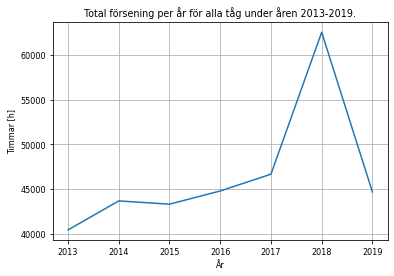

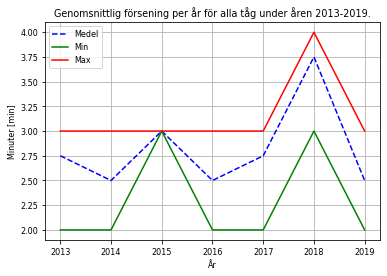

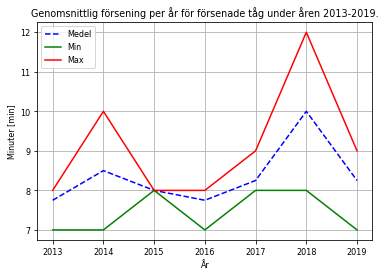

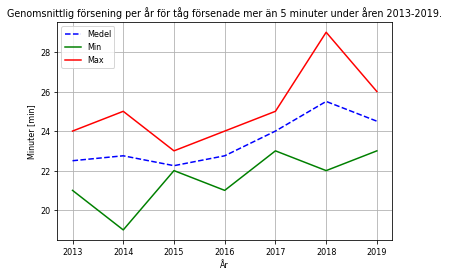

In [16]:
# Deluppgift 5:
# -------------

# Verifiera funktionen plotta _data genom att skriva ut diagrammen från listan analyserad data:

# Skriv koden här:
plotta_data(analyserad_data)


__Deluppgift 6:__ Skapa ett sammanhållet program genom att implementera den meny som finns beskriven under fliken 'Inlämningsuppgift i PingPong'. En mera detaljerad beskrivning vad de olika menyalternativen ska utföra finns under samma flik. 

In [ ]:
# Deluppgift 6:
# -------------

# Skapa ett sammanhållet program baserat på det menysystem som finns beskrivet under deluppgift 6 i fliken
# Inlämningsuppgift i PingPong

# Skriv koden här:


In [ ]:
# Deluppgift 6:
# -------------

# Verifiera att programmet fungerar korrekt genom att testa varje menyalternativ. 
# Detta görs enklast genom att exekvera programkoden i cellen ovan.